In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
import torch     
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,  TensorDataset
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from sklearn.metrics import confusion_matrix




In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [5]:
df2 = df.copy()
df2 = df2.drop(['id','Unnamed: 32'],axis=1)


Visualizing the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Benign:  357
Number of Malignant :  212


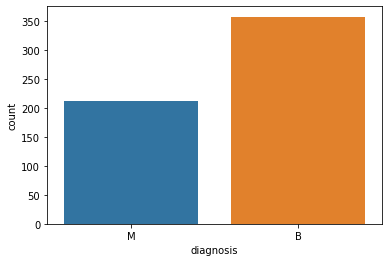

In [9]:
y = df['diagnosis']
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

In [1]:
# first ten features
# data_dia = y
# data = df2
# data_n_2 = (df2 - df2.mean()) / (df2.std())              # standardization
# data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(df2,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,20))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

NameError: ignored

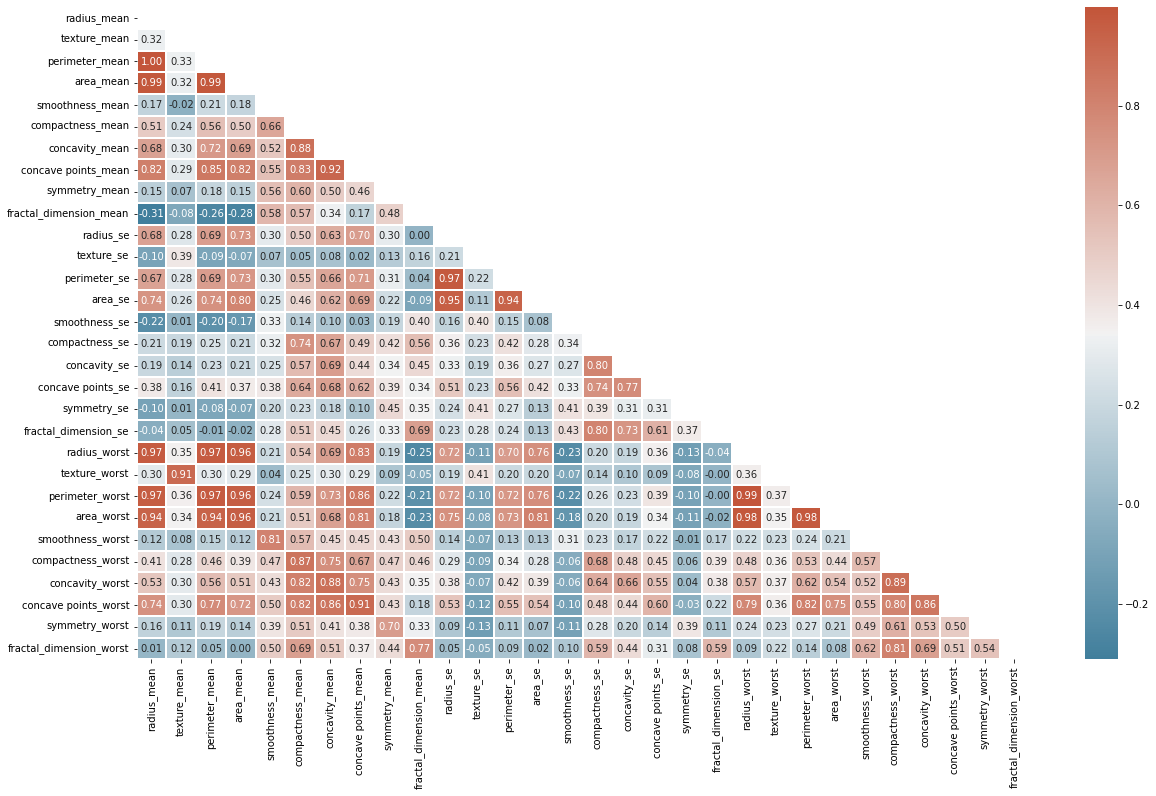

In [33]:
# heatmap 
df3 = df2
plt.figure(figsize = (20, 12))

# compute the correlation matrix
corr = df3.corr()
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

In [36]:
corr_matrix = df3.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]

reduced_df = df3.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {reduced_df.shape[1]} columns.")

reduced_df.head()

df2 = reduced_df

The reduced dataframe has 21 columns.


In [69]:
df2.iloc[:,0].replace("B", 0,inplace=True)
df2.iloc[:,0].replace("M", 1,inplace=True)
df2 = df2.astype(float)

y = df2[["diagnosis"]]
scaled_df = df2.drop('diagnosis', axis=1)
names = scaled_df.columns
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(scaled_df) 
scaled_df = pd.DataFrame(scaled_df, columns=names)

scaled_df.head()

,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.593753,0.792037,0.686364,0.605518,0.120469,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.141525,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.289880,0.181768,0.379798,0.141323,0.082589,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.303571,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.514309,0.431017,0.509596,0.211247,0.094303,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.360075,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.811321,0.811361,0.776263,1.000000,0.175875,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.385928,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.430351,0.347893,0.378283,0.186816,0.093065,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.123934,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(scaled_df)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [72]:
X = PCA_df
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=0)
sss.get_n_splits(X, y)


for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test= X.iloc[test_index]
    y_test= y.iloc[test_index]
    print(y_train.value_counts())  
    print(y_test.value_counts())

diagnosis
0.0          267
1.0          159
dtype: int64
diagnosis
0.0          90
1.0          53
dtype: int64


Converting DFs to Arrrays

In [73]:
type(np.array(X_train))
type(np.array(y_train))
type(np.array(X_test))
type(np.array(y_test))

numpy.ndarray

The model will be implemented using PyTorch, so the next step is to transform the arrays into a torch element:

In [74]:
X_train = torch.tensor(np.array(X_train), dtype=torch.float)
y_train = torch.tensor(np.array(y_train), dtype = torch.float)
df_tf = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(df_tf, batch_size=15, shuffle=True)

X_test = torch.tensor(np.array(X_test), dtype=torch.float)
y_test = torch.tensor(np.array(y_test), dtype = torch.float)
df_tf_2 = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(df_tf_2, batch_size=15, shuffle=True)


 Implementing and evaluating the model

In [75]:
classifier = nn.Sequential(
  
    nn.Linear(in_features=6, out_features=15),
    nn.ReLU(),
    nn.Linear(15, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.0001)

Training Criteria 

Optimizer

In [76]:
for epoch in range(100):
  #To store the error:
  run_loss = 0.

  for inputs, labels in train_loader:

    # inputs, labels = data
    optimizer.zero_grad()

    outputs = classifier(inputs) 
    error = criterion(outputs, labels)
    error.backward()
    optimizer.step() 

    run_loss += error.item()
  print('Epoch %3d: loss %.5f' % (epoch+1, run_loss/len(train_loader)))

Epoch   1: loss 0.68291
Epoch   2: loss 0.67290
Epoch   3: loss 0.66000
Epoch   4: loss 0.63972
Epoch   5: loss 0.61080
Epoch   6: loss 0.55501
Epoch   7: loss 0.48222
Epoch   8: loss 0.39459
Epoch   9: loss 0.32096
Epoch  10: loss 0.26275
Epoch  11: loss 0.22260
Epoch  12: loss 0.19051
Epoch  13: loss 0.17124
Epoch  14: loss 0.15599
Epoch  15: loss 0.14699
Epoch  16: loss 0.13926
Epoch  17: loss 0.12972
Epoch  18: loss 0.12464
Epoch  19: loss 0.12117
Epoch  20: loss 0.11976
Epoch  21: loss 0.11498
Epoch  22: loss 0.11265
Epoch  23: loss 0.11101
Epoch  24: loss 0.10845
Epoch  25: loss 0.10861
Epoch  26: loss 0.10795
Epoch  27: loss 0.10446
Epoch  28: loss 0.10393
Epoch  29: loss 0.10733
Epoch  30: loss 0.10159
Epoch  31: loss 0.10197
Epoch  32: loss 0.10069
Epoch  33: loss 0.10051
Epoch  34: loss 0.09949
Epoch  35: loss 0.10164
Epoch  36: loss 0.09856
Epoch  37: loss 0.09795
Epoch  38: loss 0.09923
Epoch  39: loss 0.09883
Epoch  40: loss 0.09720
Epoch  41: loss 0.09762
Epoch  42: loss 

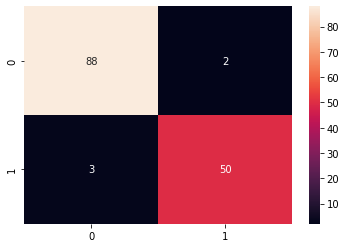

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_loader:
        output = classifier(inputs)  # Feed Network

        output = (torch.round(output)).data.numpy()
        y_pred.extend(output) # Save Prediction
        
        
        labels = labels.data.numpy()
        y_true.extend(labels) # Save Truth
        

cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sn.heatmap(cf_matrix, annot=True)
plt.savefig('output.png')

In [78]:
print(classification_report(y_pred, y_true))
print("Accuracy is:", accuracy_score(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        91
         1.0       0.94      0.96      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

Accuracy is: 0.965034965034965
